# MediRec - Skin Disease Prediction

# Using CNN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
PATH=r"C:\Users\janvi\OneDrive\Documents\SAP project\SkinDisease"

In [3]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'validation')

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to training data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to testing data directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1701 images belonging to 12 classes.
Found 1701 images belonging to 12 classes.


In [5]:
path = 'C:\\Users\\janvi\\OneDrive\\Documents\\SAP project\\SkinDisease\\train\\'

In [6]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (150, 150, 3)
print('classes: ', class_names)

classes:  ['Acne', 'Bed Bug', 'Dandruf', 'Heat Rash', 'Hives', 'Jaundice', 'Mouth Alcer', 'Ringworm', 'Skin Burn', 'Skin Cancer', 'Spider', 'healthy skin']


In [7]:
import cv2
import matplotlib.pyplot as plt 
labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
          # Skip to the next iteration or handle the error as needed  
        #image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2])[:, :, ::-1])
        
        
        #image = np.asarray(cv2.resize(images, img_size[0:2])[:, :, ::-1])  # Convert from BGR to RGB  
        
        images.append(image)
        
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')


images:

Acne -> done
Bed Bug -> done
Dandruf -> done
Heat Rash -> done
Hives -> done
Jaundice -> done
Mouth Alcer -> done
Ringworm -> done
Skin Burn -> done
Skin Cancer -> done
Spider -> done
healthy skin -> done


labels shape: (1703, 12)
images shape: (1703, 150, 150, 3)


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.40, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (1021, 150, 150, 3)
train labels shape: (1021, 12)

validation images shape: (682, 150, 150, 3)
validation labels shape: (682, 12)



In [11]:
cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

C:\Users\janvi\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 256)         │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 512)         │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      10,617,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,763,916 (48.69 MB)

 Trainable params: 12,763,916 (48.69 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.1716 - loss: 2.5267 - val_accuracy: 0.1730 - val_loss: 2.2626
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.2316 - loss: 2.1254 - val_accuracy: 0.2859 - val_loss: 2.0001
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3089 - loss: 1.9806 - val_accuracy: 0.3636 - val_loss: 1.9268
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.3528 - loss: 1.8824 - val_accuracy: 0.4135 - val_loss: 1.7007
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.4548 - loss: 1.5937 - val_accuracy: 0.4736 - val_loss: 1.5645
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5187 - loss: 1.4224 - val_accuracy: 0.5880 - val_loss: 1.4120
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5870 - loss: 1.2710 - val_accuracy: 0.6965 - val_loss: 0.9250
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.6953 - loss: 0.9396 - val_accuracy: 0.7683 - v

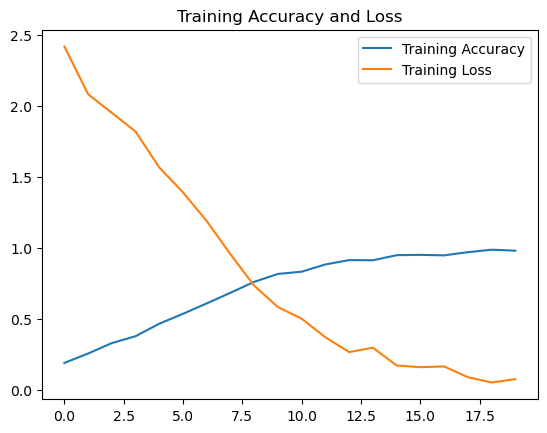

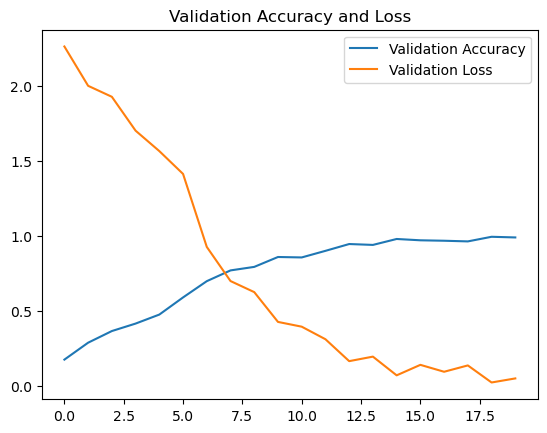

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

C:\Users\janvi\AppData\Local\Temp\ipykernel_8872\4278426066.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


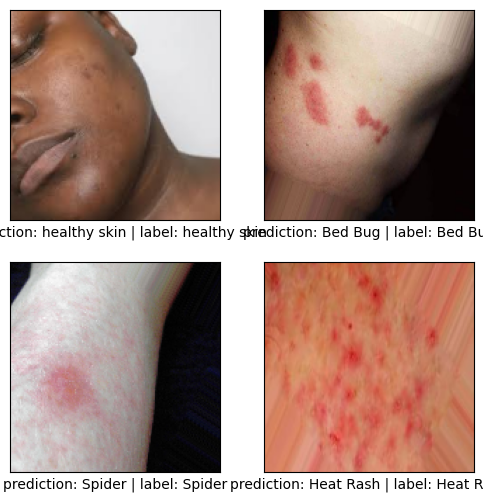

In [13]:
from IPython.core.display import display, HTML 
fig, axs = plt.subplots(2, 2,figsize=(6,6))
# plt.legend(fontsize= 66)

i = 5
for x in range(2):
    for y in range(2):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0],
       
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()

display(HTML("<h2>For more information</h2><p>click the ChatBot link</p><a href='https://cai.tools.sap/api/connect/v1/webclient/standalone/5ba5e3fa-a1ad-44de-b639-586b6295f71f'>https://cai.tools.sap/api/connect/v1/webclient/standalone/5ba5e3fa-a1ad-44de-b639-586b6295f71f</a>"))  

#for only 2 images
# fig, axs = plt.subplots(1, 2, figsize=(6, 3))  

# i = 2 # Starting index for images to display  
# for j in range(2):  # Loop to display only 2 images  
#     prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0]  
    
#     axs[j].set_xticks([])  
#     axs[j].set_yticks([])  
#     axs[j].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')  
    
#     axs[j].imshow(X_val[i])  
#     i += 1  # Increment to the next image  

# plt.tight_layout()  # Adjust layout 

C:\Users\janvi\AppData\Local\Temp\ipykernel_8872\3126471482.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Enter the path to the image you want to predict: C:\Users\janvi\OneDrive\Documents\SAP project\SkinDisease\validation\Ringworm\ringworm5_0_5045..jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Successfull loading of image


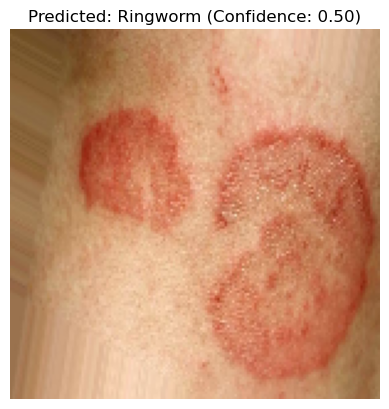

In [17]:
#Taking image from user
import numpy as np  
import matplotlib.pyplot as plt  
from IPython.core.display import display, HTML 
from tensorflow.keras.preprocessing.image import  ImageDataGenerator, array_to_img, img_to_array, load_img  
from tensorflow.keras.models import load_model  

# Load your CNN model  
# cnn_model = load_model('path_to_your_model.h5')  
# class_names = ['class1', 'class2', 'class3', 'class4']  # Add your classes here  

def load_and_preprocess_image(img_path):

    #img = image.load_img(img_path)  # Resize to the model input shape
    image = cv2.imread(img_path)  
          
    #print(type(image))  # Replace 'image' with your variable name
          
    img = cv2.resize(image, (150,150)) 
    
    img_array = image  # Already in shape (150, 150, 3)  
    
    # Convert the image to float32 to avoid the UFuncTypeError  
    img_array = img.astype(np.float32)  
    img_array /= 255.0  # Normalize the image  
    img_array = np.expand_dims(img_array, axis=0)  # Make it a batch of one
    return img_array  

def predict_image(img_path):  
    img_array = load_and_preprocess_image(img_path)  
    prediction = cnn_model.predict(img_array)  
    predicted_class = np.argmax(prediction[0])  # Get the index of the highest predicted value  
    predicted_label = class_names[predicted_class]  # Get the class name  
    confidence = np.max(prediction[0])  # Get the confidence of the prediction  
    
    # Display the image and prediction  
    image = cv2.imread(img_path)  
    if image is None:  
        print("Error loading image")
    else :
        print("Successfull loading of image")
        image = np.asarray(cv2.resize(image, img_size[0:2])[:, :, ::-1])  # Convert from BGR to RGB   
        plt.axis('off') 
        plt.imshow(image)
        plt.title(f'Predicted: {predicted_label} (Confidence: {confidence:.2f})') 
        display(HTML("<h2>For more information</h2><p>click the ChatBot link</p><a href='https://cai.tools.sap/api/connect/v1/webclient/standalone/5ba5e3fa-a1ad-44de-b639-586b6295f71f'>https://cai.tools.sap/api/connect/v1/webclient/standalone/5ba5e3fa-a1ad-44de-b639-586b6295f71f</a>"))  

        
# Get user input for image path  
img_path = input("Enter the path to the image you want to predict: ") 
predict_image(img_path)  




# try:  
#     predict_image(img_path) 
# except Exception as e:  
#     print(f"An error occurred: {e}") 
   